<a href="https://colab.research.google.com/github/arjunjanamatti/sam_kirk_project/blob/master/arima_model_prediction_csv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import auto_arima

In [3]:
eur_usd_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/^eurusd_daily_historical-data-09-30-2020.csv', index_col = [0], parse_dates = [0])
print('Shape of dataframe: ', eur_usd_df.shape)

# since the last row is not required, not considering last row
eur_usd_df = eur_usd_df.iloc[:-1, :]

# making the dataframe with first value as oldest value and last value as latest value
eur_usd_df = eur_usd_df[::-1]
eur_usd_df.head()

Shape of dataframe:  (5385, 6)


,Open,High,Low,Last,Change,Volume
Time,,,,,,
01/03/2000,1.0085,1.0280,1.0055,1.0256,0.0168,0.0
01/04/2000,1.0255,1.0340,1.0217,1.0301,0.0045,0.0
01/05/2000,1.0304,1.0400,1.0289,1.0315,0.0014,0.0
01/06/2000,1.0320,1.0413,1.0283,1.0315,0.0000,0.0
01/07/2000,1.0317,1.0333,1.0263,1.0296,-0.0019,0.0


In [4]:
eur_usd_df.index = pd.DatetimeIndex(data = eur_usd_df.index)
eur_usd_df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', name='Time', length=5384, freq=None)

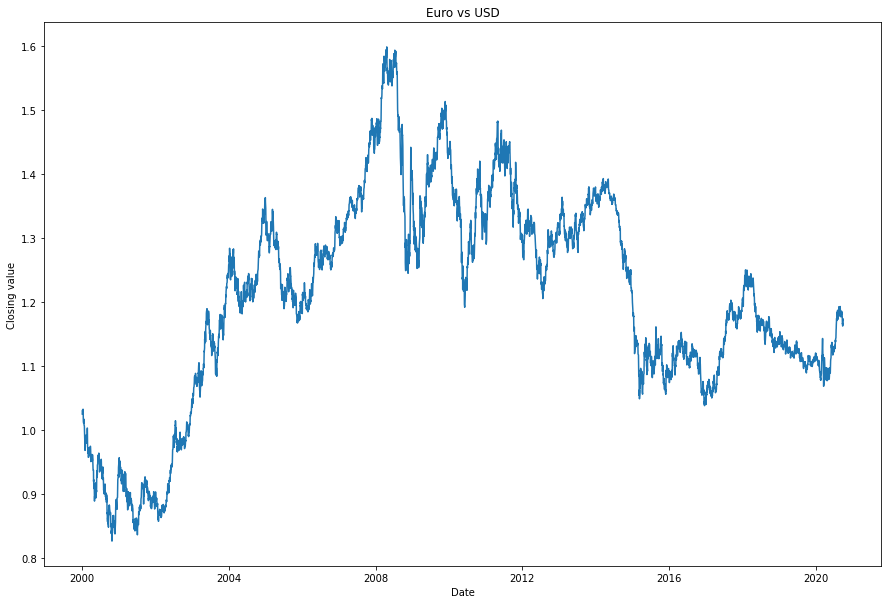

In [5]:
plt.figure(figsize = (15,10))
plt.plot(eur_usd_df['Last'])
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title ('Euro vs USD')
plt.show()


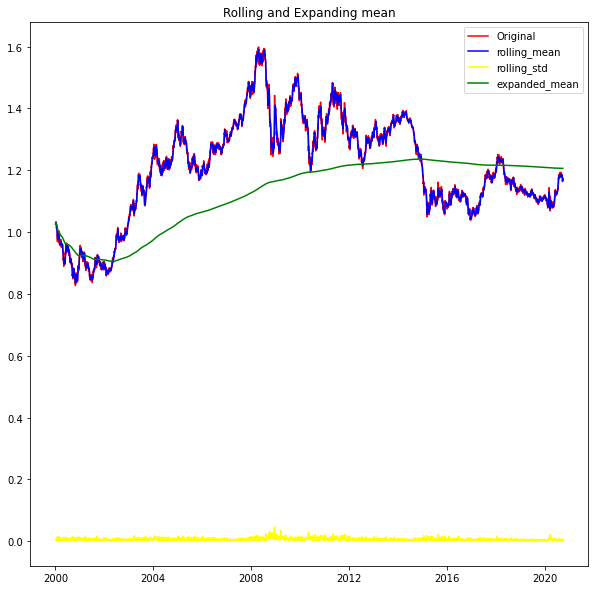

In [6]:
rolling_mean = eur_usd_df['Last'].rolling(window = 5).mean()
rolling_std = eur_usd_df['Last'].rolling(window = 5).std()
expanded_mean = eur_usd_df['Last'].expanding().mean()
plt.figure(figsize = (10,10))
plt.plot(eur_usd_df['Last'], color = 'red', label = 'Original')
plt.plot(rolling_mean, color = 'blue', label = 'rolling_mean')
plt.plot(rolling_std, color = 'yellow', label = 'rolling_std')
plt.plot(expanded_mean, color = 'green', label = 'expanded_mean')
plt.title('Rolling and Expanding mean')
plt.legend()
plt.show()

In [7]:
dicker_fuller_results = adfuller(x = eur_usd_df['Last'],
                                 autolag = 'AIC')

print('Test statistics: ', dicker_fuller_results[0])
print('p-value: ', dicker_fuller_results[1])
print('Number of lags used: ', dicker_fuller_results[2])
print('Number of observations used: ', dicker_fuller_results[3])
for keys, values in dicker_fuller_results[4].items():
  print('critical value {}: {}'.format(keys, values))

Test statistics:  -1.807480274231067
p-value:  0.37675432014003435
Number of lags used:  0
Number of observations used:  5383
critical value 1%: -3.4315653856728168
critical value 5%: -2.8620770774534745
critical value 10%: -2.567055885533713


* The plots indicate that the rolling mean is not constant, it is changing with time, hence the data is not stationary.
* The __Dickey-Fuller__ test shows that p-value is aroun 0.37, if the p-value was less than 0.05 then we could reject the null hypothesis and conclude that the data is stationary, since this is not the case the data is not stationary.
* The test statistics values are higher than the critical values, this also shows that the data is not stationary.

### Make data stationary

In [8]:
def transformed_data_results_view(data, window):
  # calculation of moving averages
  rolling_mean = data.rolling(window = window).mean()
  rolling_std = data.rolling(window = window).std()
  expanded_mean = data.expanding().mean()
  
  # plots
  plt.figure(figsize = (10,10))
  plt.plot(rolling_mean, color = 'blue', label = 'Rolling mean')
  plt.plot(rolling_std, color = 'black', label = 'Rolling std')
  plt.plot(expanded_mean, color = 'green', label = 'Expanding mean')
  plt.title('Pltos of rolling and expanding values')
  plt.legend()
  plt.show()

  # results of dickey-fuller test
  dicker_fuller_results = adfuller(x = data,
                                 autolag = 'AIC')

  print('Test statistics: ', dicker_fuller_results[0])
  print('p-value: ', dicker_fuller_results[1])
  print('Number of lags used: ', dicker_fuller_results[2])
  print('Number of observations used: ', dicker_fuller_results[3])
  for keys, values in dicker_fuller_results[4].items():
    print('critical value {}: {}'.format(keys, values))

#### Transormation results from log data

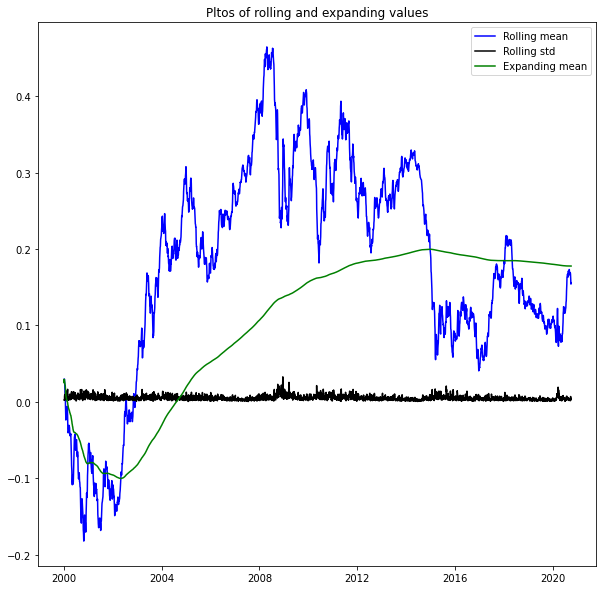

Test statistics:  -1.7443786525990814
p-value:  0.4084043815394178
Number of lags used:  0
Number of observations used:  5383
critical value 1%: -3.4315653856728168
critical value 5%: -2.8620770774534745
critical value 10%: -2.567055885533713


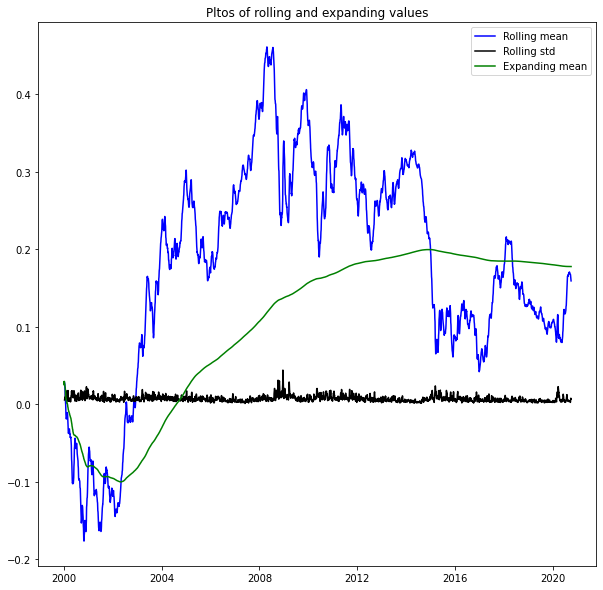

Test statistics:  -1.7443786525990814
p-value:  0.4084043815394178
Number of lags used:  0
Number of observations used:  5383
critical value 1%: -3.4315653856728168
critical value 5%: -2.8620770774534745
critical value 10%: -2.567055885533713


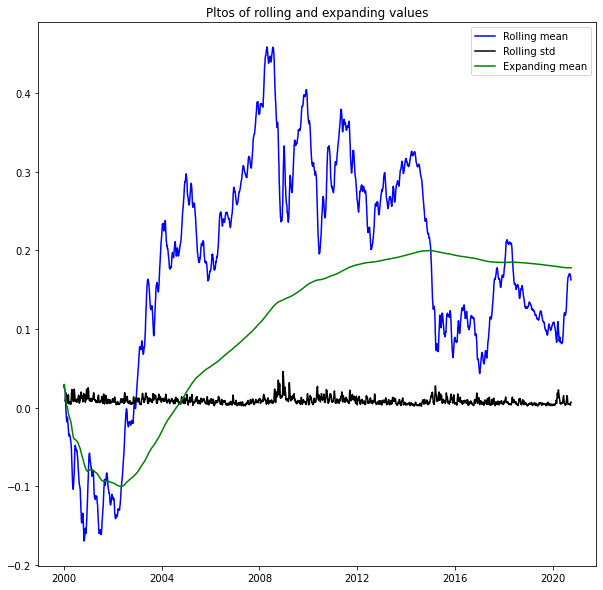

Test statistics:  -1.7443786525990814
p-value:  0.4084043815394178
Number of lags used:  0
Number of observations used:  5383
critical value 1%: -3.4315653856728168
critical value 5%: -2.8620770774534745
critical value 10%: -2.567055885533713


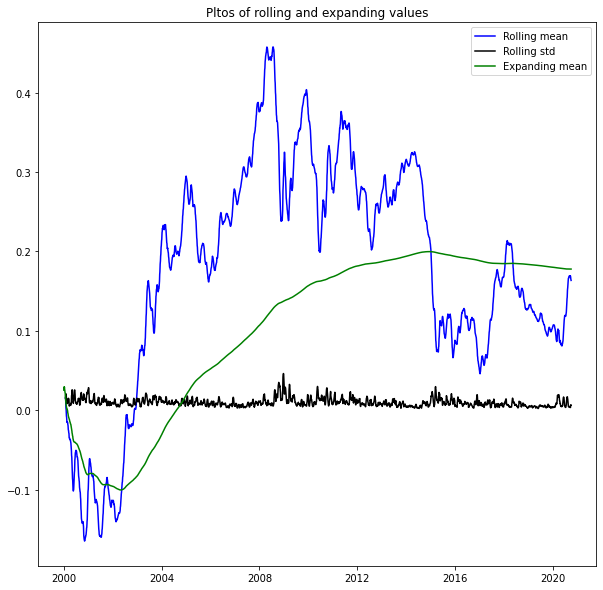

Test statistics:  -1.7443786525990814
p-value:  0.4084043815394178
Number of lags used:  0
Number of observations used:  5383
critical value 1%: -3.4315653856728168
critical value 5%: -2.8620770774534745
critical value 10%: -2.567055885533713


In [9]:
log_transformation = np.log(eur_usd_df['Last'])
transformed_data_results_view(data = log_transformation,
                              window = 5)

transformed_data_results_view(data = log_transformation,
                              window = 10)

transformed_data_results_view(data = log_transformation,
                              window = 15)

transformed_data_results_view(data = log_transformation,
                              window = 20)

#### Log transformation with moving average

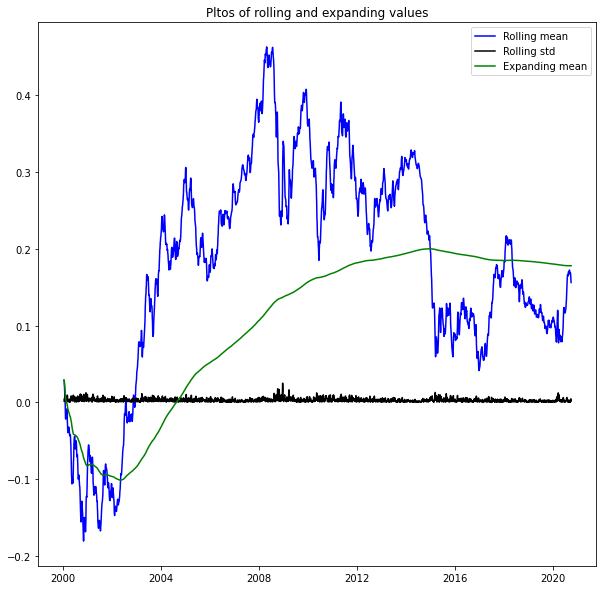

Test statistics:  -1.8868871153589488
p-value:  0.338254746391373
Number of lags used:  33
Number of observations used:  5345
critical value 1%: -3.431574030549211
critical value 5%: -2.862080896827635
critical value 10%: -2.567057918716162


In [10]:
rolling_log_transformation = log_transformation.rolling(window = 5, center = False).mean()
rolling_log_transformation = rolling_log_transformation[5:]
transformed_data_results_view(rolling_log_transformation, window = 5)

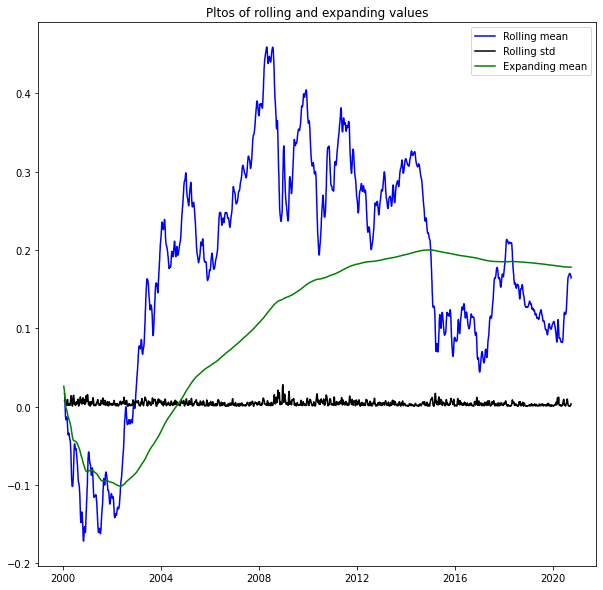

Test statistics:  -2.0218899393376715
p-value:  0.27705835988200056
Number of lags used:  32
Number of observations used:  5341
critical value 1%: -3.431574947695506
critical value 5%: -2.8620813020294067
critical value 10%: -2.5670581344189243


In [11]:
rolling_log_transformation = log_transformation.rolling(window = 10, center = False).mean()
rolling_log_transformation = rolling_log_transformation[10:]
transformed_data_results_view(rolling_log_transformation, window = 10)

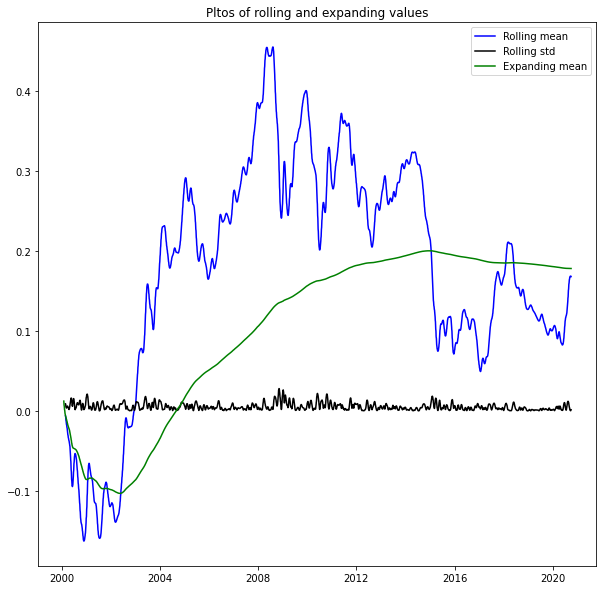

Test statistics:  -1.8819443487323957
p-value:  0.34060214533900324
Number of lags used:  33
Number of observations used:  5330
critical value 1%: -3.4315774769492307
critical value 5%: -2.862082419471088
critical value 10%: -2.567058729271461


In [12]:
rolling_log_transformation = log_transformation.rolling(window = 20, center = False).mean()
rolling_log_transformation = rolling_log_transformation[20:]
transformed_data_results_view(rolling_log_transformation, window = 20)

* With increase in window for moving average, there was improvement in p-value, but with further increase the p-value is not decreasing.

#### Transformation with difference between log data and first order difference of log data
* difference = log_data - log_data.shift()


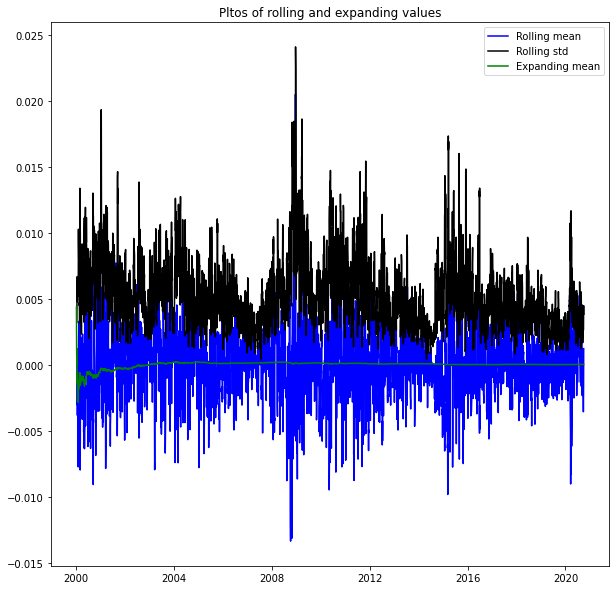

Test statistics:  -73.91012915367638
p-value:  0.0
Number of lags used:  0
Number of observations used:  5382
critical value 1%: -3.4315656116048294
critical value 5%: -2.8620771772721496
critical value 10%: -2.5670559386705563


In [13]:
difference_log_transformation = log_transformation.diff(periods = 1)
difference_log_transformation = difference_log_transformation[1:]
transformed_data_results_view(data = difference_log_transformation, window = 5)

#### Decomposition: trend, seasonality, residuals
* Based on the __Dickey-Fuller test__, the p-value is less than 0.05, hence we can reject the null hypothesis and data can be considered as stationary.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

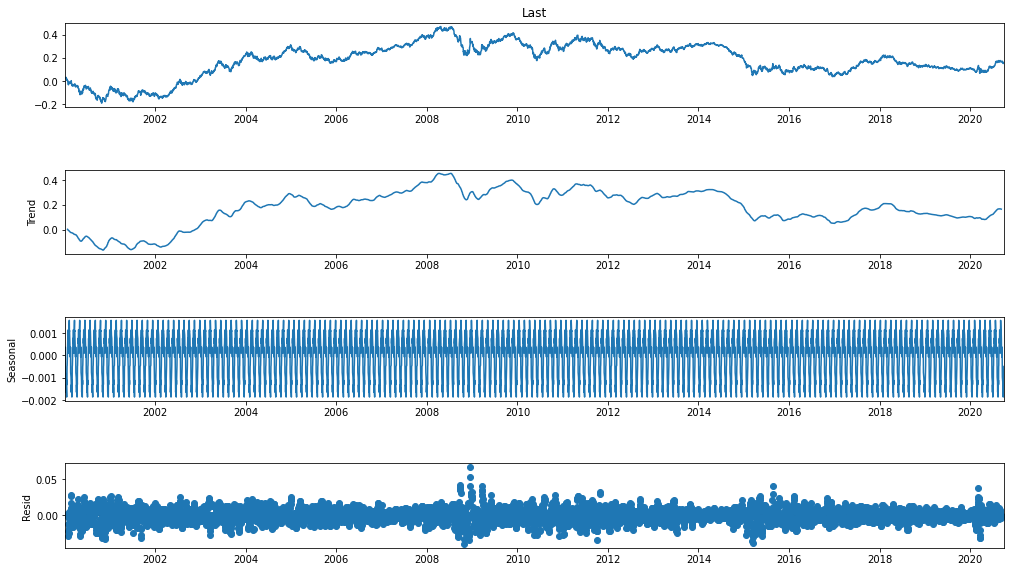

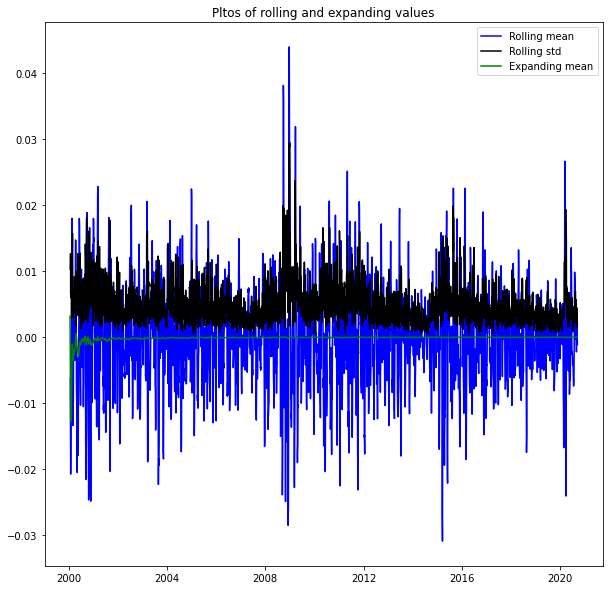

Test statistics:  -18.264215704303446
p-value:  2.3274038208361382e-30
Number of lags used:  31
Number of observations used:  5322
critical value 1%: -3.431579322976679
critical value 5%: -2.862083235058105
critical value 10%: -2.567059163436508


In [14]:
seasonal_result = seasonal_decompose(x = log_transformation,
                                     freq = 30)
figure =  plt.figure()
figure = seasonal_result.plot()
figure.set_size_inches(16,9)
seasonal_result_resid = seasonal_result.resid.dropna()
transformed_data_results_view(data = seasonal_result_resid, window = 5)

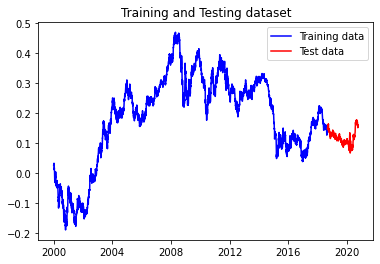

In [15]:
train_data  = log_transformation[:int(len(log_transformation)*0.9)]
test_data = log_transformation[int(len(log_transformation)*0.9):]
plt.plot(train_data, color = 'blue')
plt.plot(test_data, color = 'red' )
plt.legend(['Training data', 'Test data'])
plt.title('Training and Testing dataset')
plt.show()

In [16]:
model_auto_arima = auto_arima(y = train_data,
                              start_p = 0,
                              start_q = 0,
                              test = 'adf',
                              max_p = 5,
                              max_q = 5,
                              d = None,
                              seasonal = True,
                              start_P = 0,
                              D = 0,
                              trace = True,
                              error_action = 'ignore',
                              suppress_warnings = True,
                              stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-35493.442, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-35491.910, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-35491.920, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-35495.360, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-35489.441, Time=4.83 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.538 seconds


In [17]:
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4845
Model:               SARIMAX(0, 1, 0)   Log Likelihood               17748.680
Date:                Mon, 05 Oct 2020   AIC                         -35495.360
Time:                        12:39:25   BIC                         -35488.875
Sample:                             0   HQIC                        -35493.084
                               - 4845                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.845e-05   5.89e-07     65.296      0.000    3.73e-05    3.96e-05
===================================================================================
Ljung-Box (Q):                       39.68   Jarque-Bera (JB):               467.47
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
arima_model = ARIMA(endog = train_data,
                    order = (0,1,0))
fitted_model = arima_model.fit(disp = -1)
fitted_model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Last   No. Observations:                 4844
Model:                 ARIMA(0, 1, 0)   Log Likelihood               17748.721
Method:                           css   S.D. of innovations              0.006
Date:                Mon, 05 Oct 2020   AIC                         -35493.442
Time:                        12:39:25   BIC                         -35480.471
Sample:                             1   HQIC                        -35488.888
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.539e-05   8.91e-05      0.285      0.776      -0.000       0.000
==============================================================================
"""

### Forecasting using ARIMA model

In [19]:
fc, se, conf = fitted_model.forecast(steps = len(test_data),
                                     alpha = 0.05)

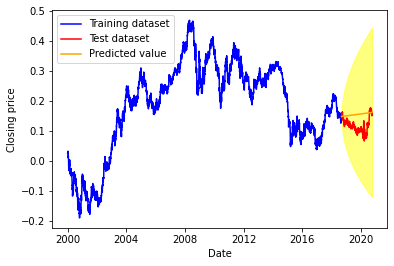

In [20]:
fc_series = pd.Series(data = fc,
                      index = test_data.index)
lower_series = pd.Series(conf[:,0],
                         index = test_data.index)
upper_series = pd.Series(conf[:,1],
                         index = test_data.index)
plt.plot(train_data,
         color = 'blue',
         label = 'Training dataset')
plt.plot(test_data,
         color = 'red',
         label = 'Test dataset')
plt.plot(fc_series,
         color = 'orange',
         label = 'Predicted value')
plt.fill_between(x = lower_series.index,
                 y1 = lower_series,
                 y2 = upper_series,
                 color = 'yellow',
                 alpha = 0.5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()